# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [29]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [30]:
def f(x):
    F = (x**2)*numpy.sin(x)
    return F;
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE

Ensure your function works with numpy arrays:

In [31]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [32]:
def g(x):
    I = 2*x*numpy.sin(x)+(2-x**2)*numpy.cos(x)-2
    return I;
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE

Check your solution with the same numpy array:

In [33]:
assert g(0) == 0.

In [34]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [35]:
def integrate_analytic(xmin, xmax):
    D = g(xmax) - g(xmin)
    return D;
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE

Check your analytic function:

In [36]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [37]:
def integrate_numeric(xmin, xmax, N):
    dx = (xmax - xmin) / N
    
    X = xmin
    M = 0
    S = 0
    
    for i in range (0, N):
        M = X + dx / 2
        S += 4 * f(M) + 2 * f(X)
        X += dx
        
    X += dx * xmin
    I = dx / 6 * (f(xmin) + S + f(xmax))
    return I;
    
    

Make sure you have implemented Simpson's rule correctly:

In [38]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [39]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


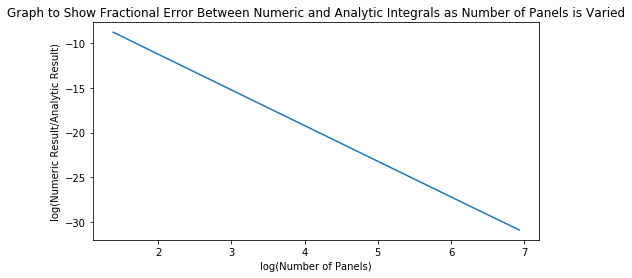

In [41]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution *enumerate*


r0 = integrate_numeric(x0, x1, panel_counts[0])
r1 = integrate_numeric(x0, x1, panel_counts[1])
r2 = integrate_numeric(x0, x1, panel_counts[2])
r3 = integrate_numeric(x0, x1, panel_counts[3])
r4 = integrate_numeric(x0, x1, panel_counts[4])
r5 = integrate_numeric(x0, x1, panel_counts[5])
r6 = integrate_numeric(x0, x1, panel_counts[6])
r7 = integrate_numeric(x0, x1, panel_counts[7])
r8 = integrate_numeric(x0, x1, panel_counts[8])


result_numeric = [r0, r1, r2, r3, r4, r5, r6, r7, r8]


plt.figure(figsize=(8,4))
plt.plot(numpy.log(panel_counts), numpy.log((numpy.abs(result_numeric-result_analytic))/result_numeric))
plt.xlabel("log(Number of Panels)")
plt.ylabel("log(Numeric Result/Analytic Result)")
plt.title("Graph to Show Fractional Error Between Numeric and Analytic Integrals as Number of Panels is Varied")
plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing number of panels increases the accuracy of the numerical method for smooth functions. As the Simpson's rule is being used for this integral, as N (the number of panels) increases, the error increases by N^(-4). However, computers have a finite precesion and therefore at large N where the panel width is very small, the true value of the panel width is rounded off leading to larger integration errors at too large N. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

As the number of panels N is increased, the integration error increases by N^(-2) at smaller N. Like above however, the finite precision of computers means there is a cut off point at which increasing N no longer decreases the integration error. As the trapezium rule is a lower order approximation than the Simpson's rule, for any given function this cut off point occurs at a higher N. 